In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

df= pd.read_csv('TED_TALKS_data.csv').drop(columns =['link'])
df


,title,author,date,views,likes
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72
...,...,...,...,...,...
5435,The best stats you've ever seen,Hans Rosling,February 2006,15000000,458000
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000
5437,Greening the ghetto,Majora Carter,February 2006,2900000,88000
5438,Simplicity sells,David Pogue,February 2006,2000000,60000


# Separando o ano da coluna 'date':

In [50]:
anos = []
for c in df['date']:
    anos.append(c.split(' ')[1])
anos = pd.DataFrame(anos, columns=['anos'])


In [51]:
#  Juntando os anos separados com o dataframe principal:

df = df.join(anos, lsuffix='anos')
df

,title,author,date,views,likes,anos
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,2021
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,2022
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,2021
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,2021
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,2021
...,...,...,...,...,...,...
5435,The best stats you've ever seen,Hans Rosling,February 2006,15000000,458000,2006
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,2006
5437,Greening the ghetto,Majora Carter,February 2006,2900000,88000,2006
5438,Simplicity sells,David Pogue,February 2006,2000000,60000,2006


# Anos sem repetição: 

In [52]:
anossemrep = []
for c in df['anos']:
    if c not in anossemrep:
        anossemrep.append(c)
anossemrep = pd.DataFrame(anossemrep, columns = ['Ano']).sort_values(by="Ano", ascending=False).reset_index().drop(['index'], axis=1)


# Contagem por ano de quantos vídeos foram postado:  

In [53]:
contagemano= []
for c in anossemrep['Ano']:
    cont = 0
    for i in df['anos']:
        if c == i:
            cont += 1
    contagemano.append(cont)
contagemano = pd.DataFrame(contagemano, columns=['Vídeos por ano'])


# Data Frame do ano e da recorrência:

In [54]:
anossemrep = anossemrep.join(contagemano, how = 'right', lsuffix='std', rsuffix='Vídeos por ano').sort_values(by="Ano", ascending=True).drop([0]).reset_index().drop(columns =['index'])
anossemrep

,Ano,Vídeos por ano
0,1970,2
1,1972,1
2,1983,1
3,1984,1
4,1990,1
5,1991,1
6,1994,1
7,1998,6
8,2001,5
9,2002,26


# Plotando gráfico de contagem x ano

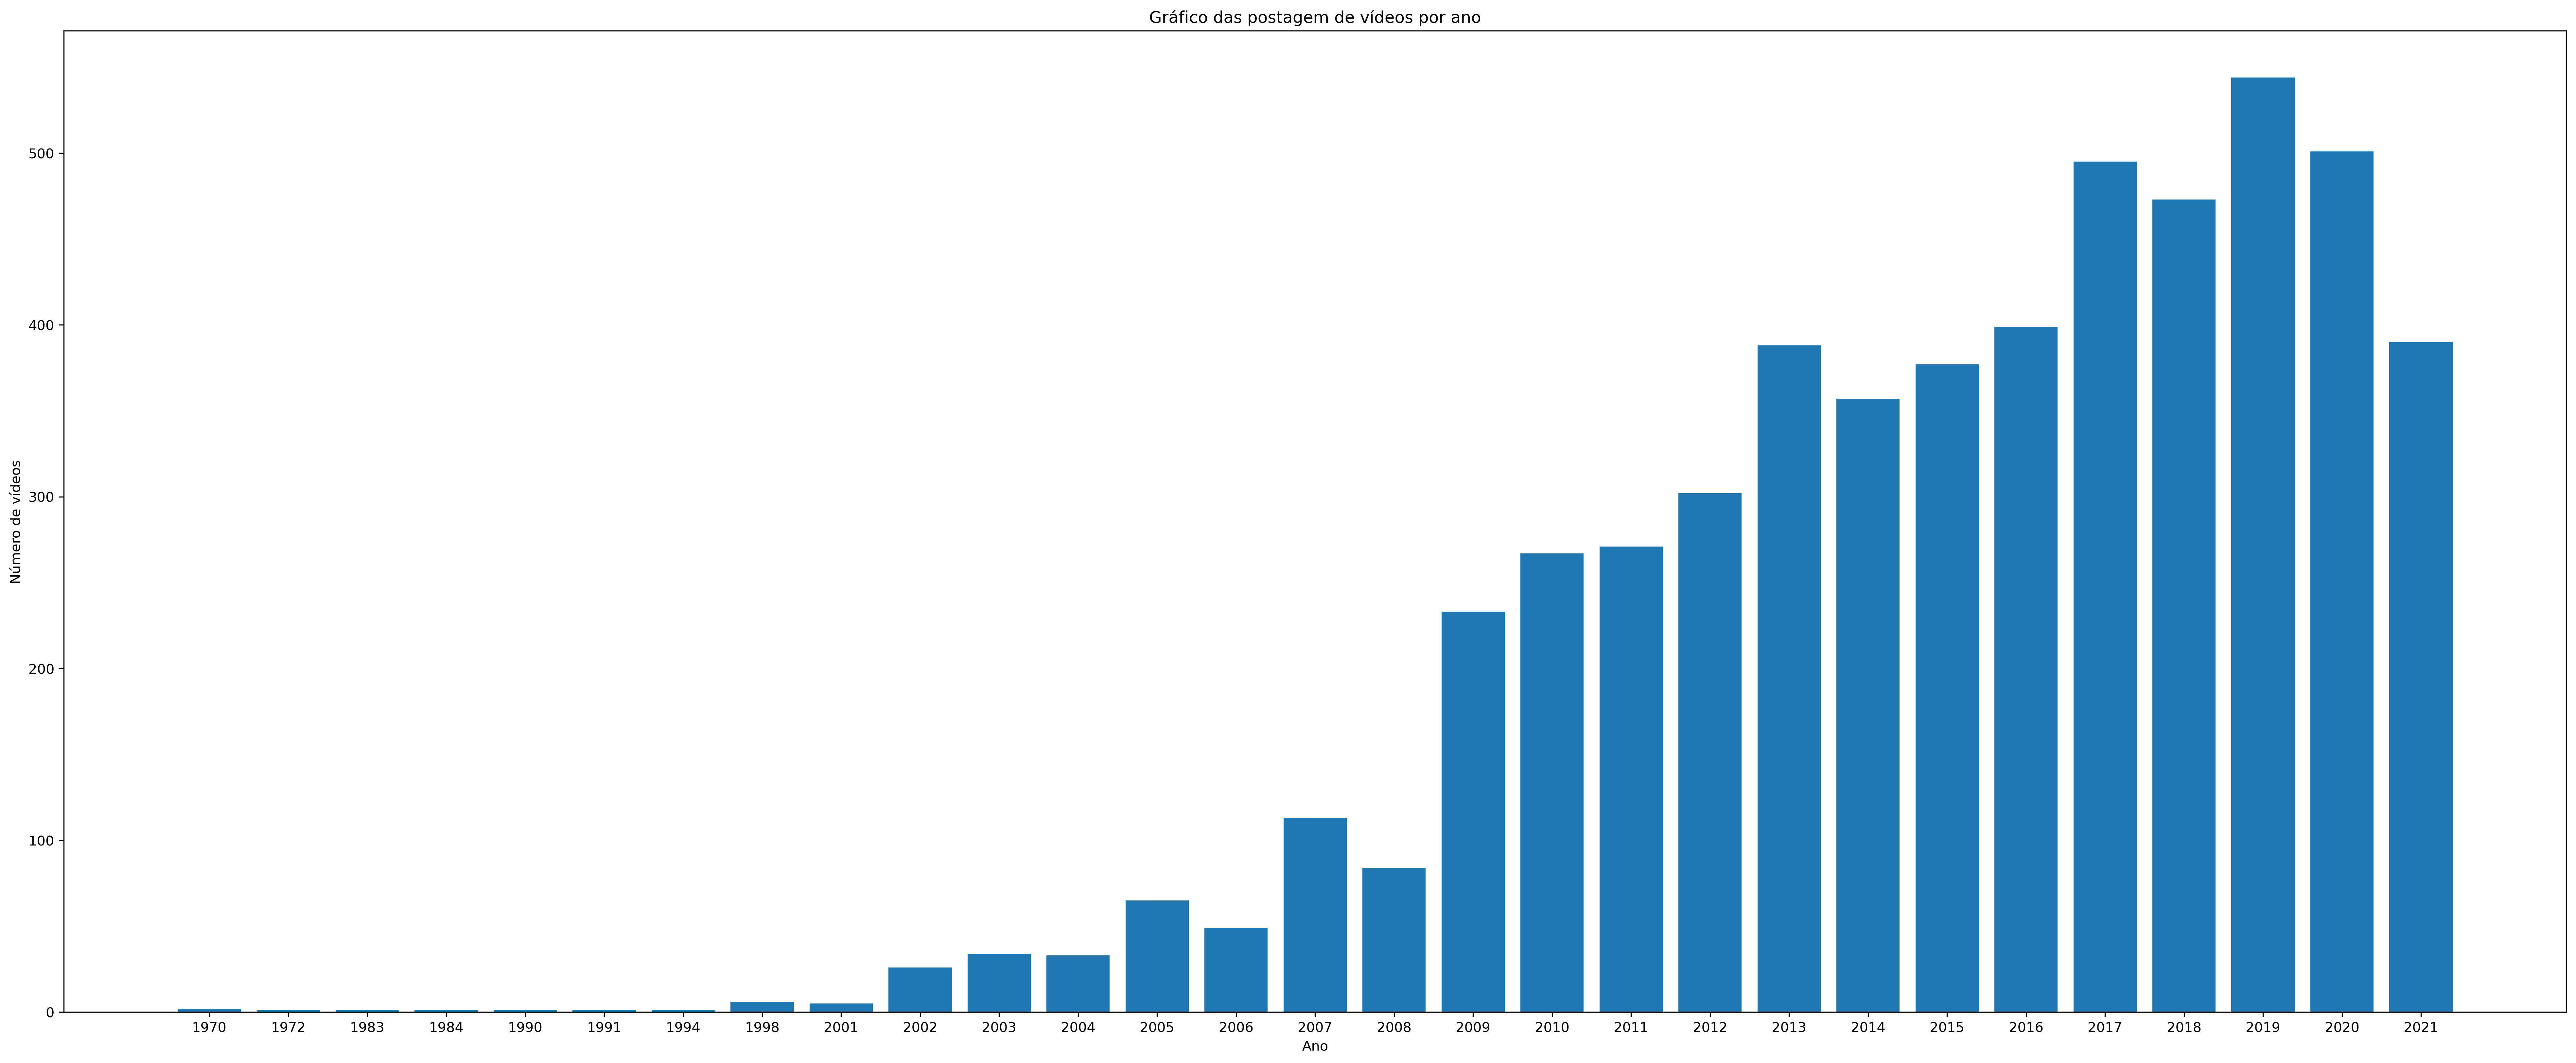

In [55]:
fig = plt.figure(figsize=(15, 10), dpi=300)
ax = fig.add_axes([1,1,1.7,1])
ax.bar(anossemrep['Ano'],anossemrep['Vídeos por ano'])
plt.xlabel('Ano')
plt.ylabel('Número de vídeos')
plt.title('Gráfico das postagem de vídeos por ano')
plt.show()

# Vizualização por ano:

In [56]:
viewyear= []
for c in anossemrep['Ano']:
    total = 0
    for n ,i in enumerate(df['anos']):
        if c == i:
            total += df['views'][n]
    viewyear.append(total)
viewyear = pd.DataFrame(viewyear, columns=['View per year']).reset_index().drop(columns=['index'])


In [57]:
# Data Frame dos vídeos por ano e a quantidade de views por ano

anossemrep = anossemrep.join(viewyear)
anossemrep

,Ano,Vídeos por ano,View per year
0,1970,2,252000
1,1972,1,1300000
2,1983,1,690000
3,1984,1,1100000
4,1990,1,723000
5,1991,1,327000
6,1994,1,699000
7,1998,6,7410000
8,2001,5,10530000
9,2002,26,30442000


In [58]:
likes = []
for c in anossemrep['Ano']:
    total = 0
    for n ,i in enumerate(df['anos']):
        if c == i:
            total += df['likes'][n]
    likes.append(total)
likes = pd.DataFrame(likes, columns=['likes']).reset_index().drop(columns=['index'])


In [59]:
anossemrep = anossemrep.join(likes)
anossemrep

,Ano,Vídeos por ano,View per year,likes
0,1970,2,252000,7500
1,1972,1,1300000,41000
2,1983,1,690000,20000
3,1984,1,1100000,33000
4,1990,1,723000,21000
5,1991,1,327000,9800
6,1994,1,699000,20000
7,1998,6,7410000,226100
8,2001,5,10530000,315100
9,2002,26,30442000,915700


# Plotando gráfico de views x ano:

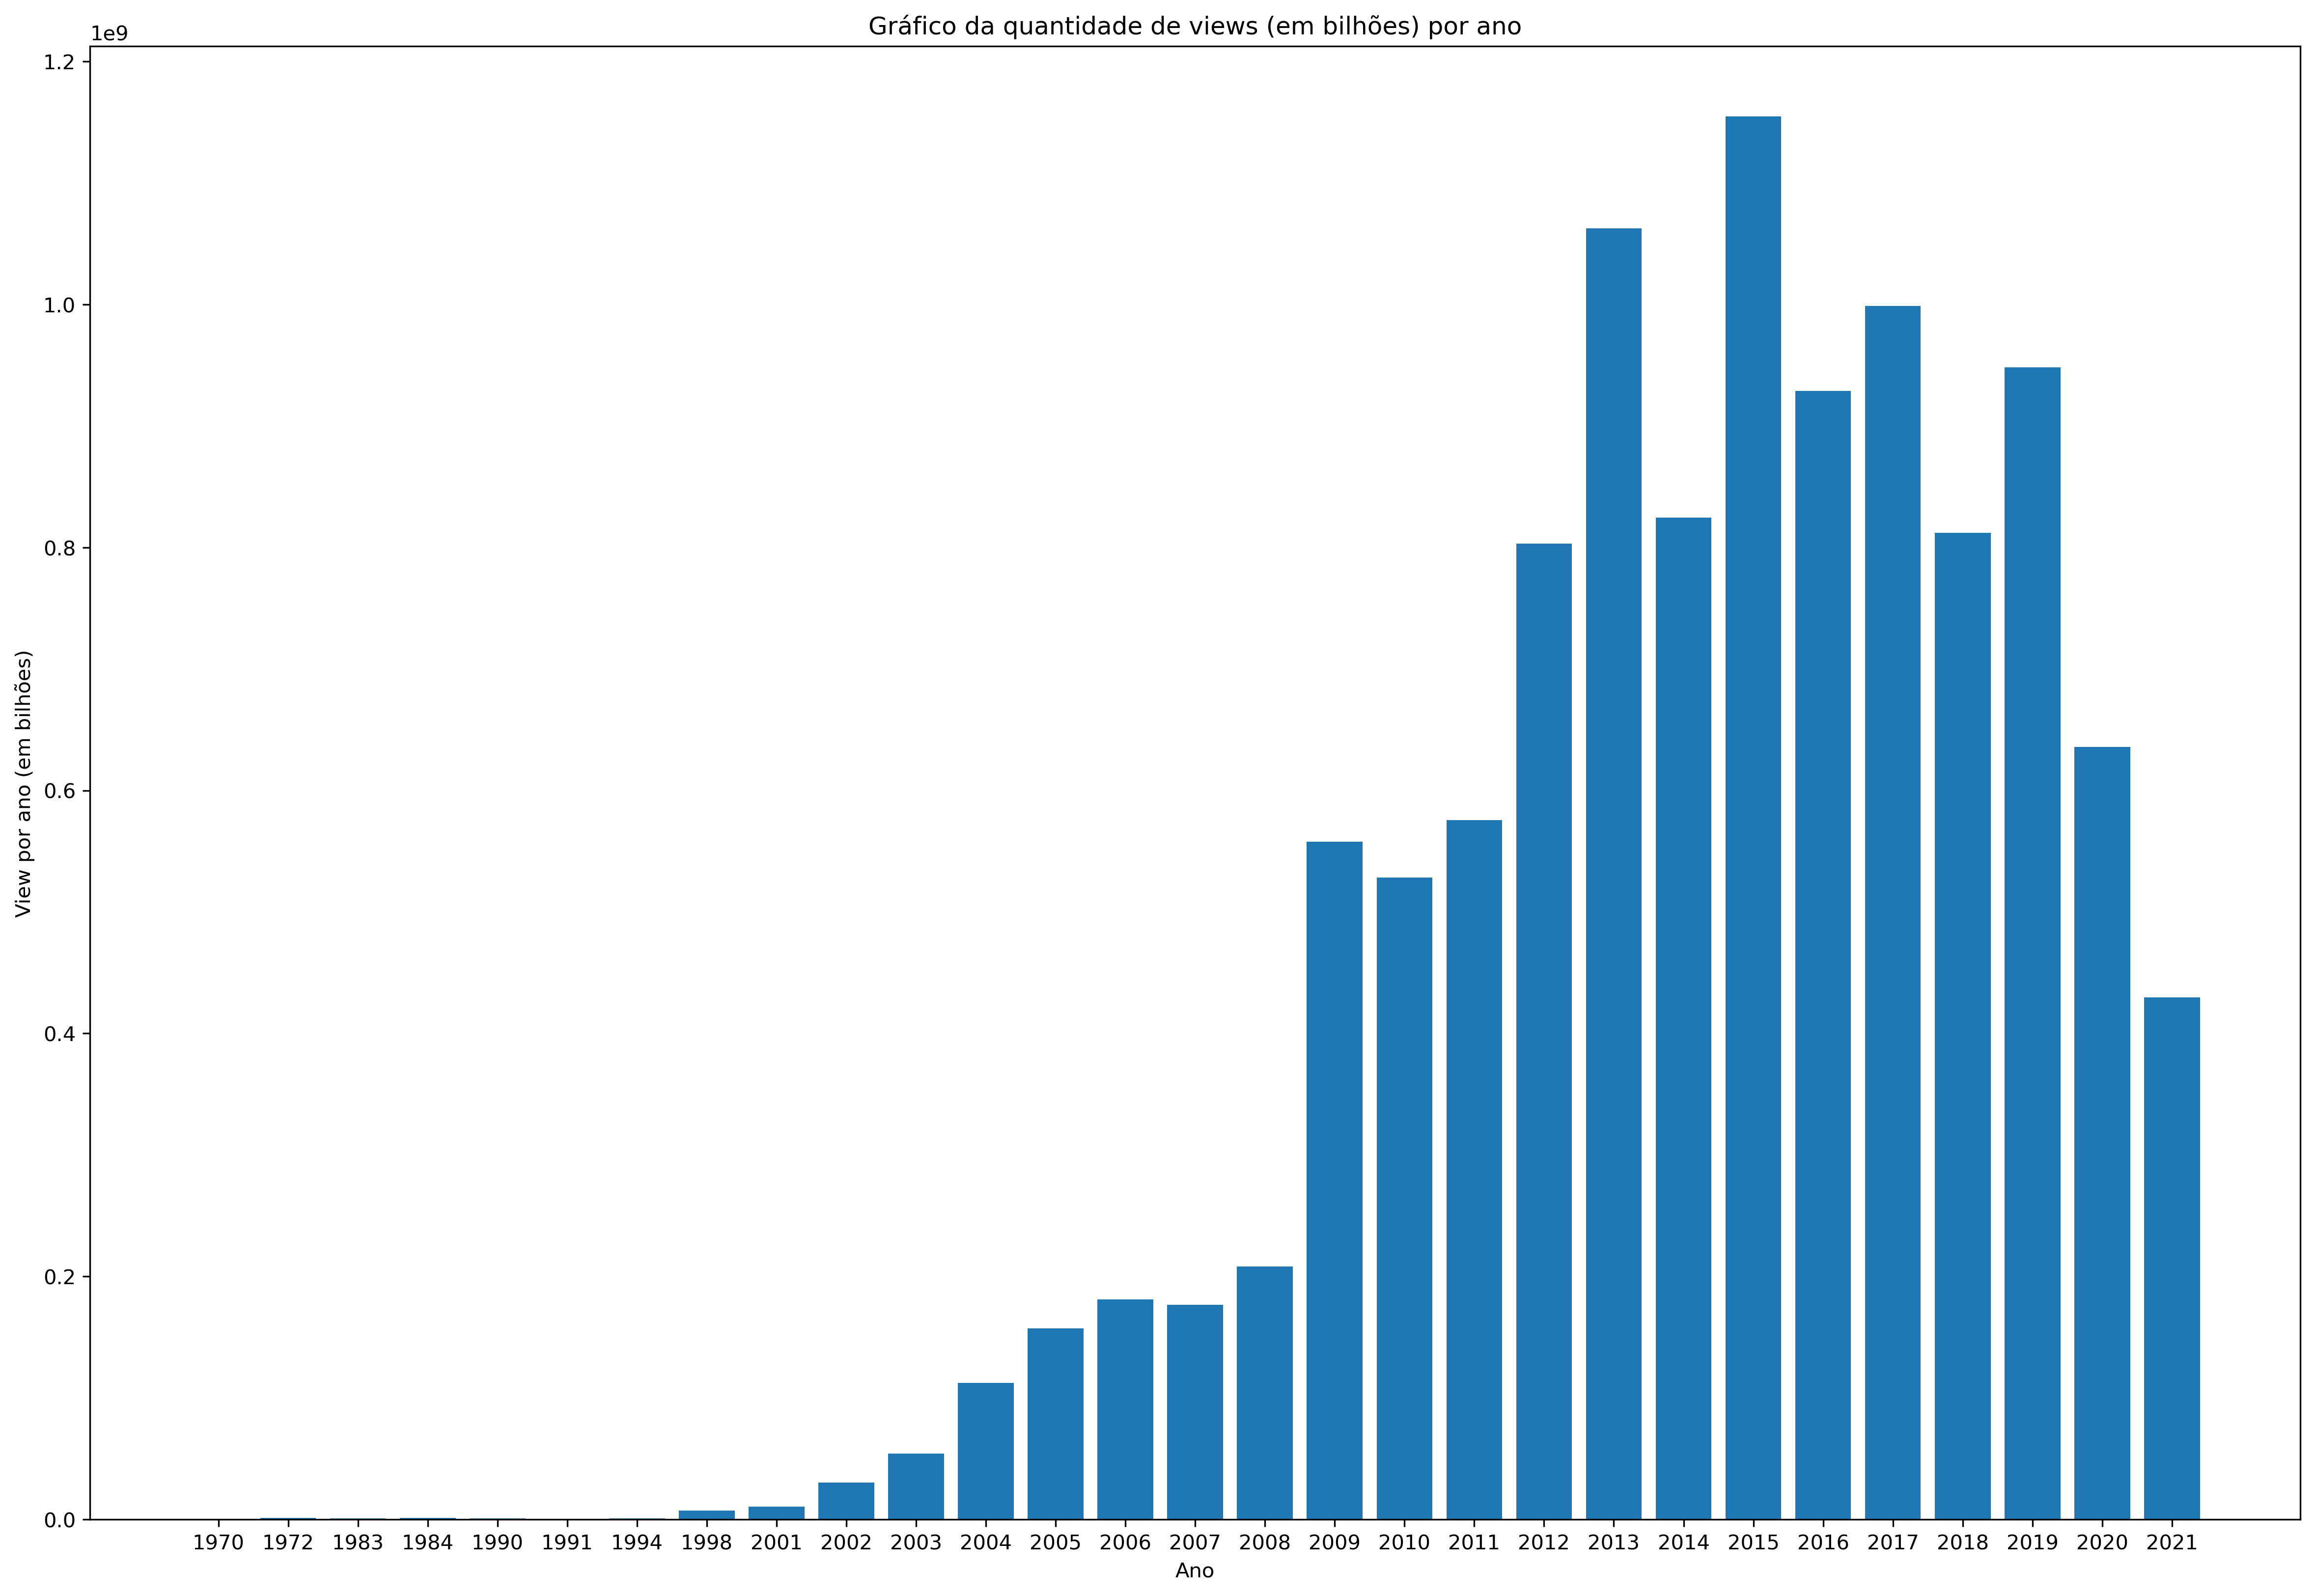

In [60]:
fig = plt.figure(figsize=(15, 10), dpi=300)
ax = fig.add_axes([1,1,1,1])
ax.bar(anossemrep['Ano'],anossemrep['View per year'])
plt.xlabel('Ano')
plt.ylabel('View por ano (em bilhões)')
plt.title('Gráfico da quantidade de views (em bilhões) por ano')
plt.show()

# Medidas de tendências

MEDIA VISUALIZAÇÃO

In [61]:
media = (anossemrep['View per year']/anossemrep['Vídeos por ano']).round(2)
media = pd.DataFrame(media, columns = ['Media de visualizações por ano'])
anossemrep = anossemrep.join(media)

MEDIA LIKES

In [62]:
media_likes = (anossemrep['likes']/anossemrep['Vídeos por ano']).round(2)
media_likes = pd.DataFrame(media_likes, columns = ['Media de likes por ano'])
anossemrep = anossemrep.join(media_likes)

In [63]:
anossemrep

,Ano,Vídeos por ano,View per year,likes,Media de visualizações por ano,Media de likes por ano
0,1970,2,252000,7500,126000.00,3750.00
1,1972,1,1300000,41000,1300000.00,41000.00
2,1983,1,690000,20000,690000.00,20000.00
3,1984,1,1100000,33000,1100000.00,33000.00
4,1990,1,723000,21000,723000.00,21000.00
5,1991,1,327000,9800,327000.00,9800.00
6,1994,1,699000,20000,699000.00,20000.00
7,1998,6,7410000,226100,1235000.00,37683.33
8,2001,5,10530000,315100,2106000.00,63020.00
9,2002,26,30442000,915700,1170846.15,35219.23


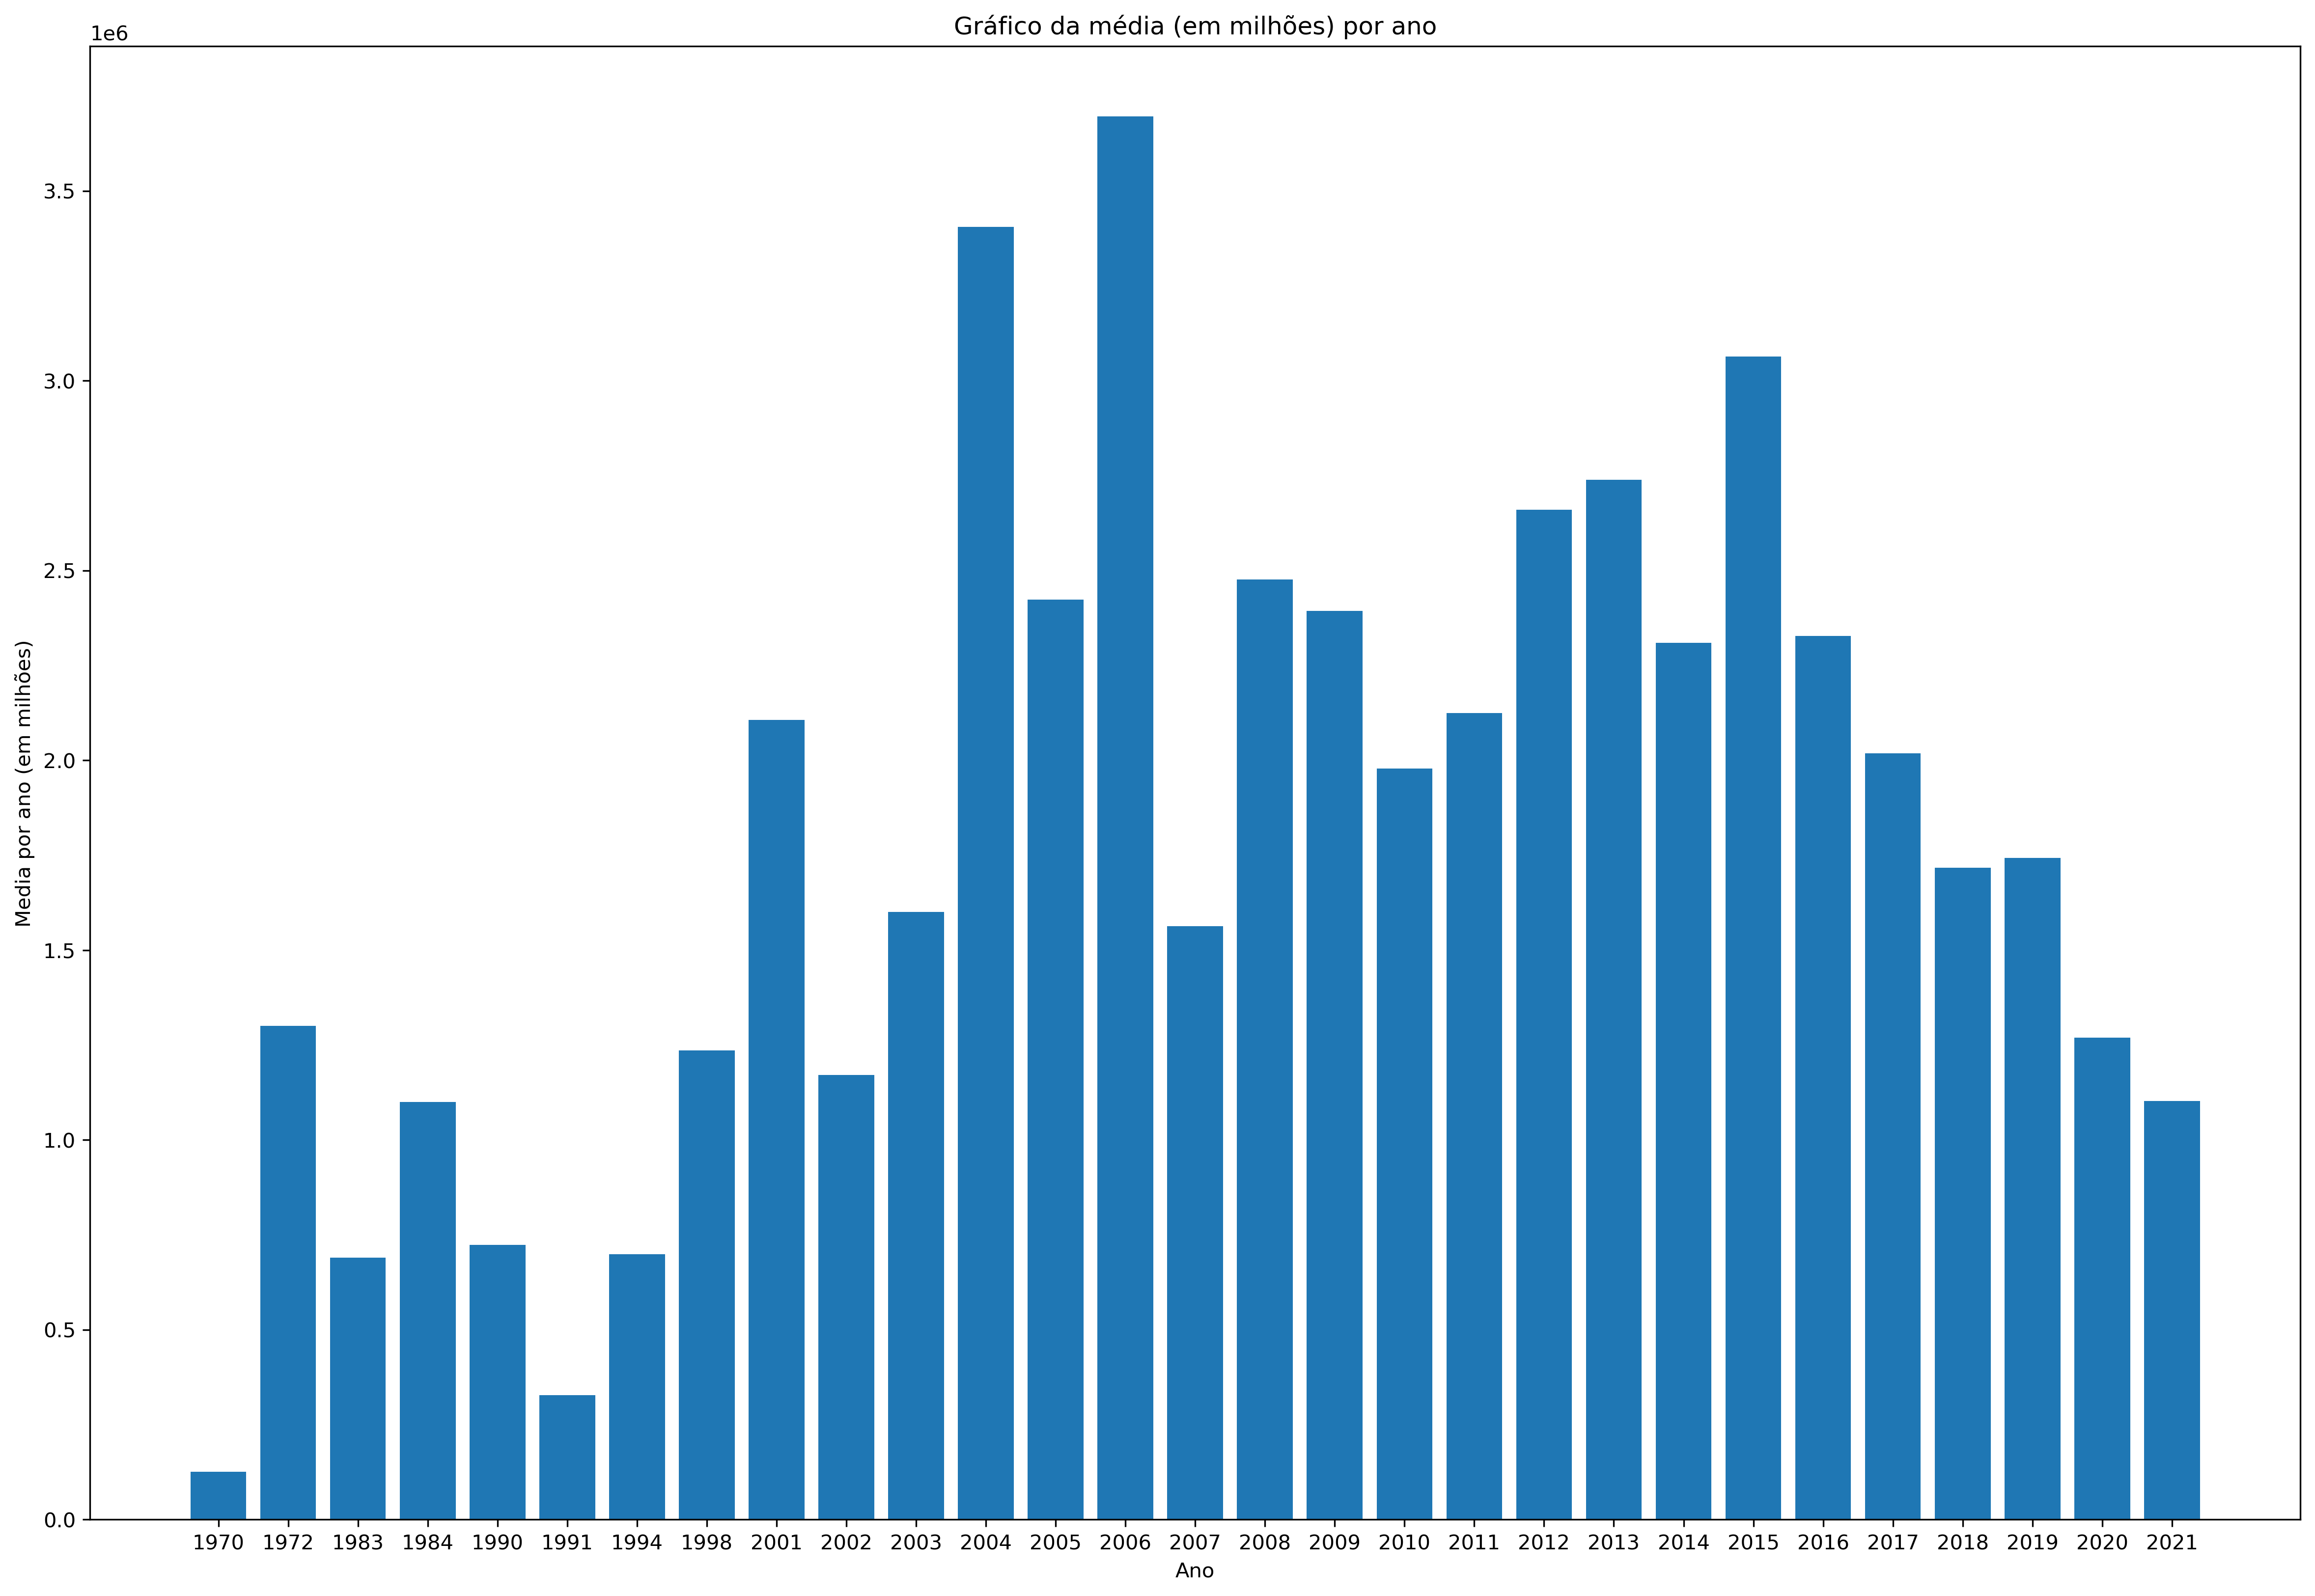

In [65]:
fig = plt.figure(figsize=(15, 10), dpi=300)
ax = fig.add_axes([1,1,1,1])
ax.bar(anossemrep['Ano'],anossemrep['Media de visualizações por ano'])
plt.xlabel('Ano')
plt.ylabel('Media por ano (em milhões)')
plt.title('Gráfico da média (em milhões) por ano')
plt.show()

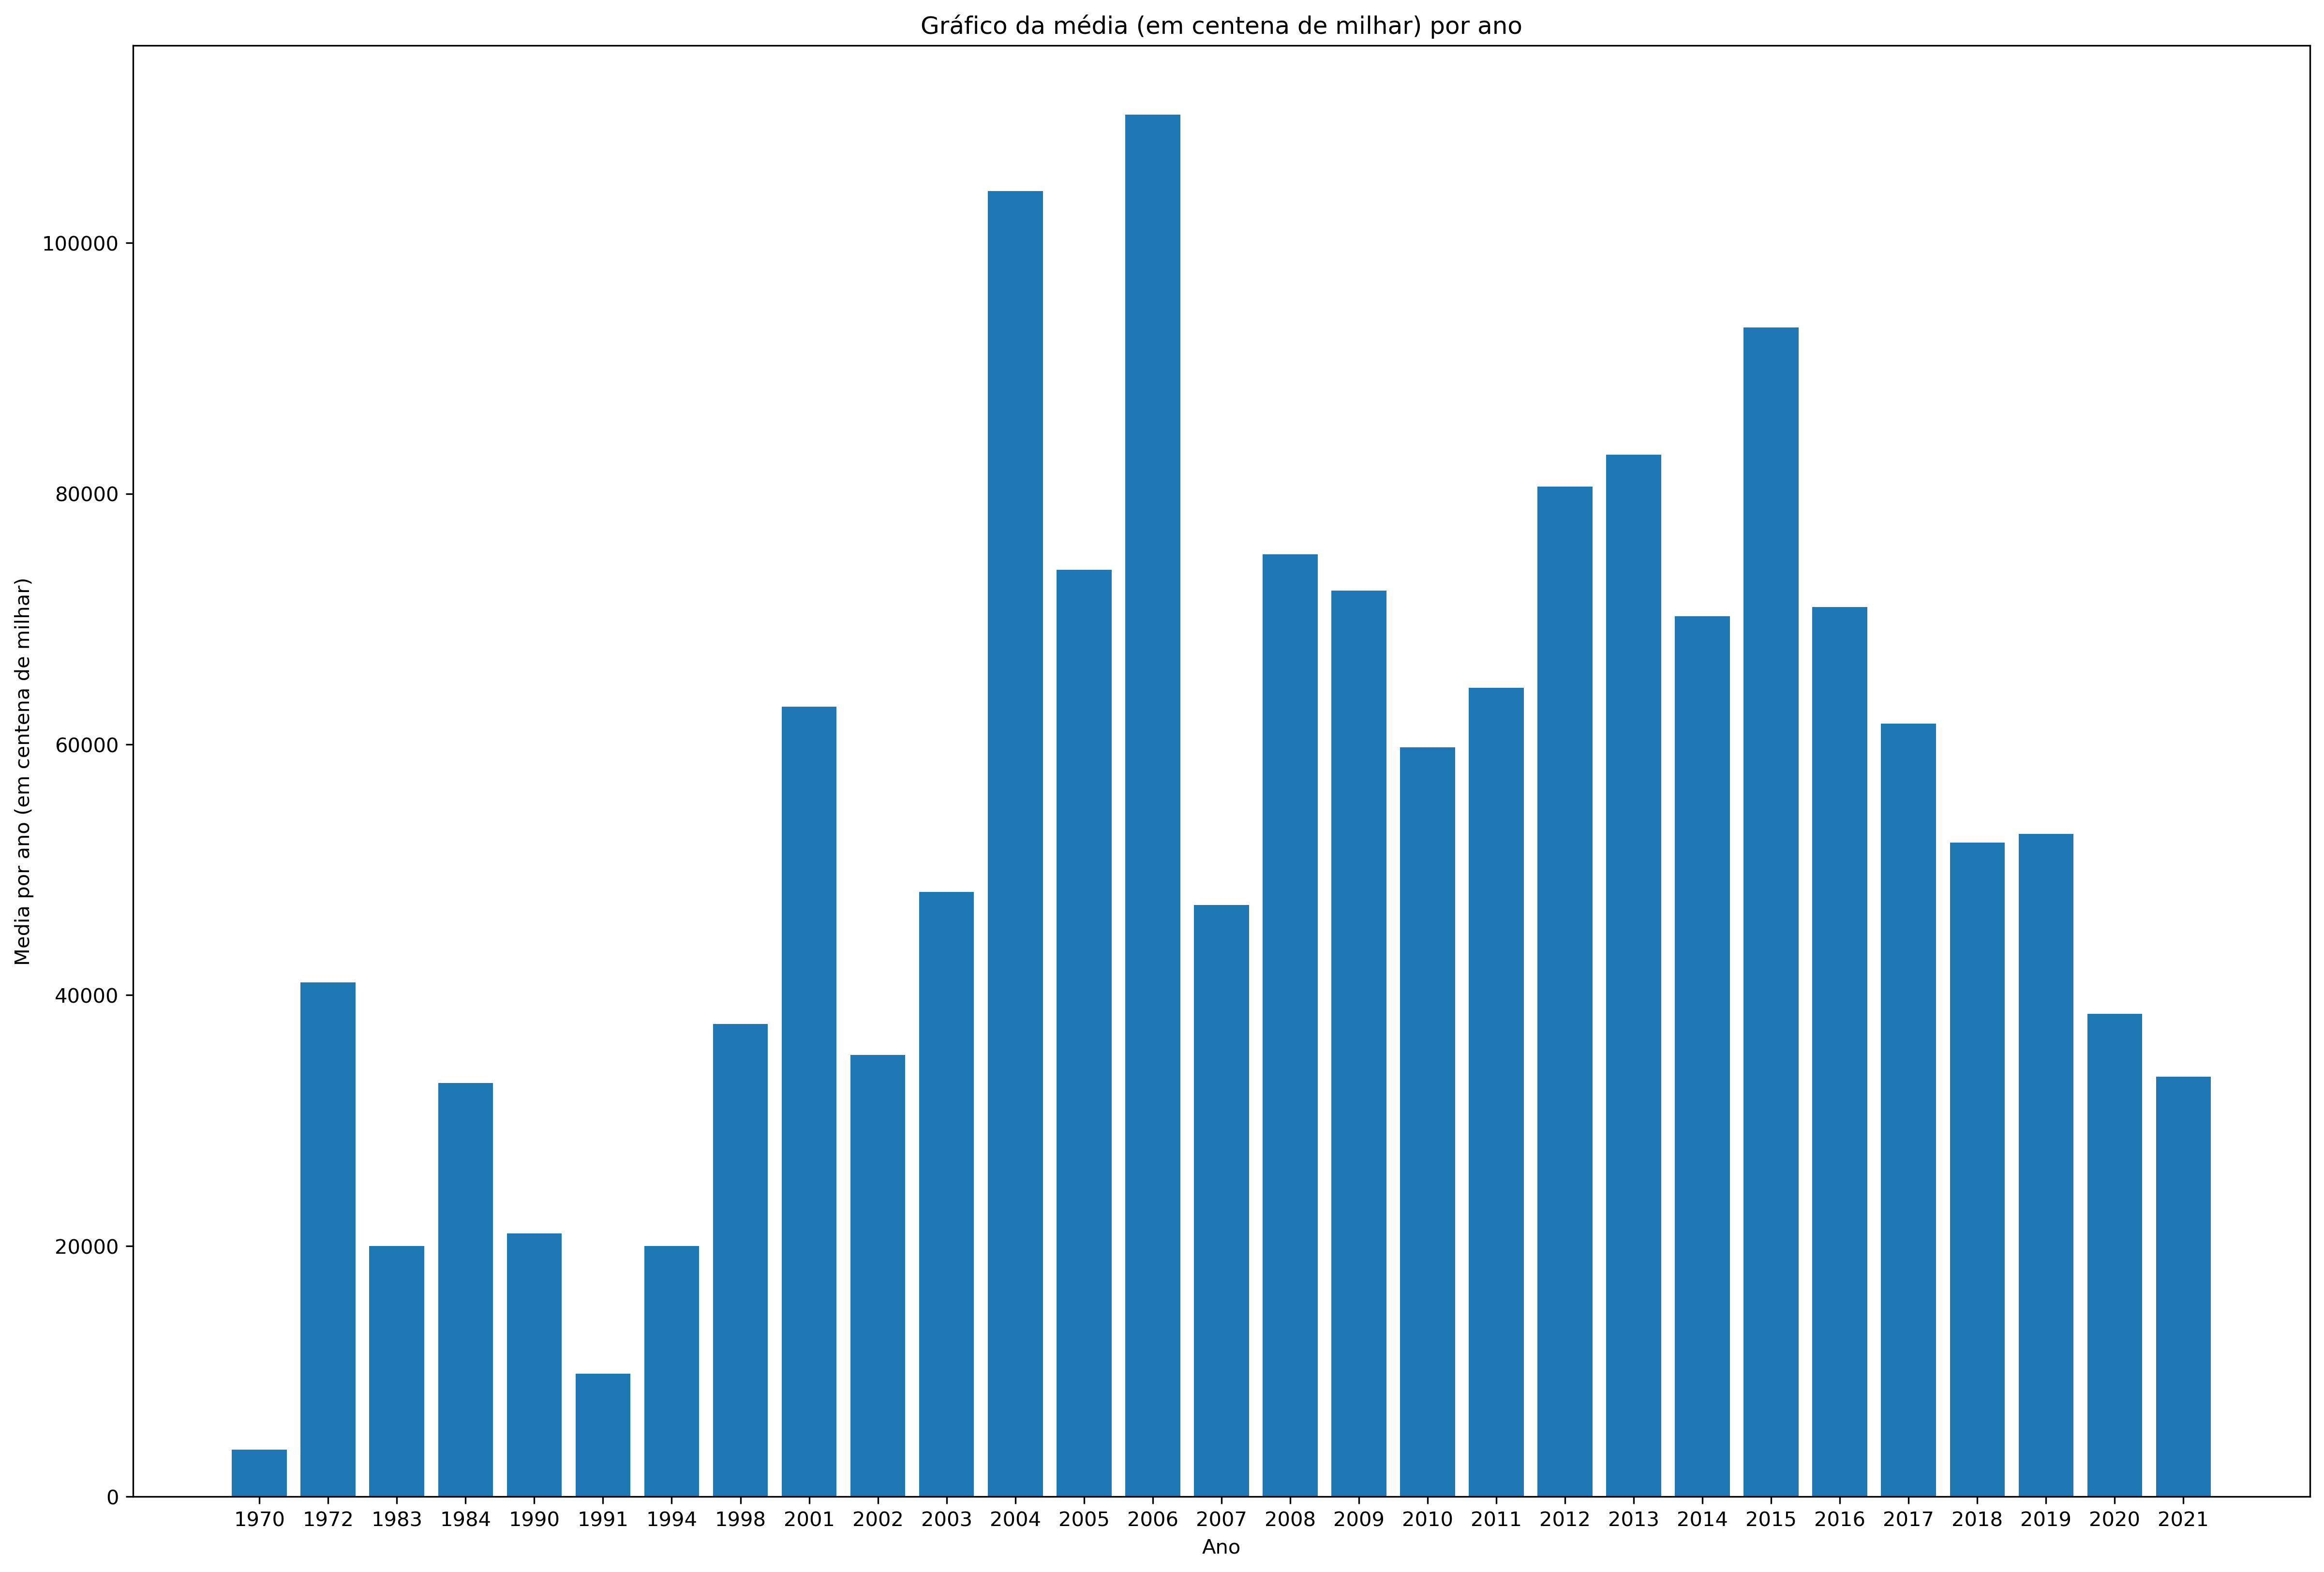

In [68]:
fig = plt.figure(figsize=(15, 10), dpi=300)
ax = fig.add_axes([1,1,1,1])
ax.bar(anossemrep['Ano'],anossemrep['Media de likes por ano'])
plt.xlabel('Ano')
plt.ylabel('Media por ano (em centena de milhar)')
plt.title('Gráfico da média (em centena de milhar) por ano')
plt.show()

In [72]:
anossemrep['Media de visualizações por ano'].std()

892578.4953269627

<AxesSubplot:>

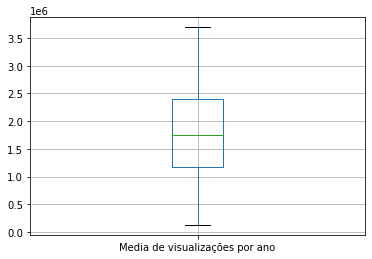

In [73]:
anossemrep.boxplot(column='Media de visualizações por ano')

<AxesSubplot:>

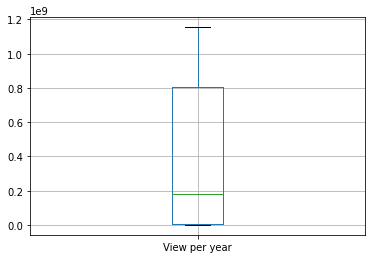

In [74]:
anossemrep.boxplot(column='View per year')

In [76]:
anossemrep['Media de likes por ano'].std()

27144.698993585218

<AxesSubplot:>

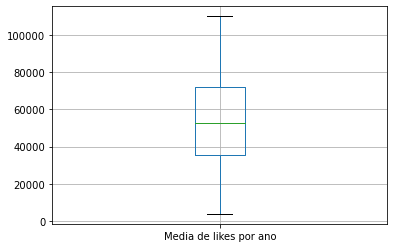

In [77]:
anossemrep.boxplot(column='Media de likes por ano')